In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('infant_development_dataset.csv')
dataset.head()

,infant_id,age_months,height_cm,weight_kg,milestone_score,speech_score,period
0,1,31,87.131229,15.069140,68.021936,102.133267,pre_covid
1,2,25,87.237638,16.034869,75.305256,89.340480,pre_covid
2,3,23,85.887134,16.977430,55.608942,89.827530,pre_covid
3,4,30,85.666237,14.464047,81.424646,84.722783,pre_covid
4,5,5,73.751033,10.164924,77.066009,84.761291,pre_covid


In [3]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
print(dataset.head())

   infant_id  age_months  height_cm  weight_kg  milestone_score  speech_score  \
0        111          17  76.769686  13.610782        85.009172     77.179558   
1        420          26  83.051313  10.863639        68.045308     93.570985   
2        566          28  81.182053  15.418023        91.281495     85.559252   
3         78          13  75.995788  11.470351        75.280803     86.737652   
4        182          26  82.293630  15.004258        85.510677     85.311021   

       period  
0   pre_covid  
1  post_covid  
2  post_covid  
3   pre_covid  
4   pre_covid  


In [4]:
dataset.isna().sum()

infant_id          0
age_months         0
height_cm          0
weight_kg          0
milestone_score    0
speech_score       0
period             0
dtype: int64

In [5]:
x = dataset.iloc[:, :-1].values
x

array([[111.        ,  17.        ,  76.76968601,  13.61078245,
         85.00917188,  77.17955804],
       [420.        ,  26.        ,  83.05131333,  10.86363906,
         68.04530769,  93.57098541],
       [566.        ,  28.        ,  81.18205336,  15.41802335,
         91.28149546,  85.55925192],
       ...,
       [271.        ,  14.        ,  72.98423838,  12.75260549,
         76.82129208,  73.9939117 ],
       [436.        ,  12.        ,  74.07420025,   8.29130125,
         49.37666341,  76.08972237],
       [103.        ,  17.        ,  80.89907367,  12.23801102,
         87.68727492,  78.75725317]])

In [6]:
y = dataset.iloc[:, -1].values
y

array(['pre_covid', 'post_covid', 'post_covid', 'pre_covid', 'pre_covid',
       'during_covid', 'pre_covid', 'post_covid', 'pre_covid',
       'during_covid', 'pre_covid', 'pre_covid', 'pre_covid',
       'post_covid', 'during_covid', 'during_covid', 'pre_covid',
       'during_covid', 'pre_covid', 'pre_covid', 'pre_covid',
       'post_covid', 'post_covid', 'post_covid', 'during_covid',
       'post_covid', 'pre_covid', 'pre_covid', 'post_covid', 'post_covid',
       'post_covid', 'pre_covid', 'pre_covid', 'during_covid',
       'pre_covid', 'post_covid', 'pre_covid', 'post_covid', 'post_covid',
       'during_covid', 'during_covid', 'pre_covid', 'post_covid',
       'post_covid', 'pre_covid', 'pre_covid', 'post_covid', 'pre_covid',
       'pre_covid', 'post_covid', 'during_covid', 'during_covid',
       'pre_covid', 'post_covid', 'post_covid', 'during_covid',
       'during_covid', 'pre_covid', 'pre_covid', 'pre_covid', 'pre_covid',
       'pre_covid', 'during_covid', 'post_covid', 

In [7]:
#encoding missing values

dataset.fillna({
    'age_months': dataset['age_months'].mean(),
    'height_cm': dataset['height_cm'].mean(),
    'weight_kg': dataset['weight_kg'].mean(),
    'speech_score': dataset['speech_score'].mean(),
    'period': dataset['period'].mode()[0] }, inplace=True)

In [8]:
# Encoding categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2,
       1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1,
       0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2,

In [9]:
x

array([[111.        ,  17.        ,  76.76968601,  13.61078245,
         85.00917188,  77.17955804],
       [420.        ,  26.        ,  83.05131333,  10.86363906,
         68.04530769,  93.57098541],
       [566.        ,  28.        ,  81.18205336,  15.41802335,
         91.28149546,  85.55925192],
       ...,
       [271.        ,  14.        ,  72.98423838,  12.75260549,
         76.82129208,  73.9939117 ],
       [436.        ,  12.        ,  74.07420025,   8.29130125,
         49.37666341,  76.08972237],
       [103.        ,  17.        ,  80.89907367,  12.23801102,
         87.68727492,  78.75725317]])

In [10]:
#training the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)
x_train

array([[474.        ,  23.        ,  78.97951366,  11.39366171,
         89.97368971,  72.95447563],
       [191.        ,  29.        ,  85.97125872,  14.49243952,
         77.66009333,  99.77444832],
       [222.        ,  16.        ,  68.49672067,  11.45039966,
         56.13318342,  69.78835013],
       ...,
       [514.        ,  18.        ,  80.83463022,   7.73946824,
         60.99326009,  78.1433206 ],
       [ 70.        ,  18.        ,  73.6238647 ,  11.50645298,
         92.04922922,  75.42671625],
       [274.        ,  35.        ,  83.67491912,  17.9355326 ,
         86.68249059,  73.3671546 ]])

In [11]:
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from xgboost import XGBClassifier


In [13]:
# Initialize XGBoost 2.0 model
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    # XGBoost 2.0 specific parameters
    tree_method='hist',  # or 'gpu_hist' for GPU acceleration
    enable_categorical=False,  # set to True if you have categorical features
    verbosity=1
)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
y_pred_xgb = xgb.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.9866666666666667

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

cs_report_xgb = classification_report(y_test, y_pred_xgb)
print(cs_report_xgb)

[[49  0  0]
 [ 2 51  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.96      0.98        53
           2       1.00      1.00      1.00        48

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [17]:
!pip install catboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Initialize CatBoost model
catboost = CatBoostClassifier(
    iterations=100,           # Similar to n_estimators
    depth=6,                  # Similar to max_depth
    learning_rate=0.1,
    random_state=42,
    verbose=100,              # Shows training progress every 100 iterations
    loss_function='MultiClass' # For multi-class classification
)

# Train the model
catboost.fit(x_train, y_train)

# Make predictions
y_pred_catboost = catboost.predict(x_test)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(accuracy_catboost)

0:	learn: 0.9591188	total: 156ms	remaining: 15.4s
99:	learn: 0.0076930	total: 685ms	remaining: 0us
0.9933333333333333


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix and classification report
cm_catboost = confusion_matrix(y_test, y_pred_catboost)
print("Confusion Matrix:")
print(cm_catboost)

cs_report_catboost = classification_report(y_test, y_pred_catboost)
print("Classification Report:")
print(cs_report_catboost)

Confusion Matrix:
[[49  0  0]
 [ 1 52  0]
 [ 0  0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      0.98      0.99        53
           2       1.00      1.00      1.00        48

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



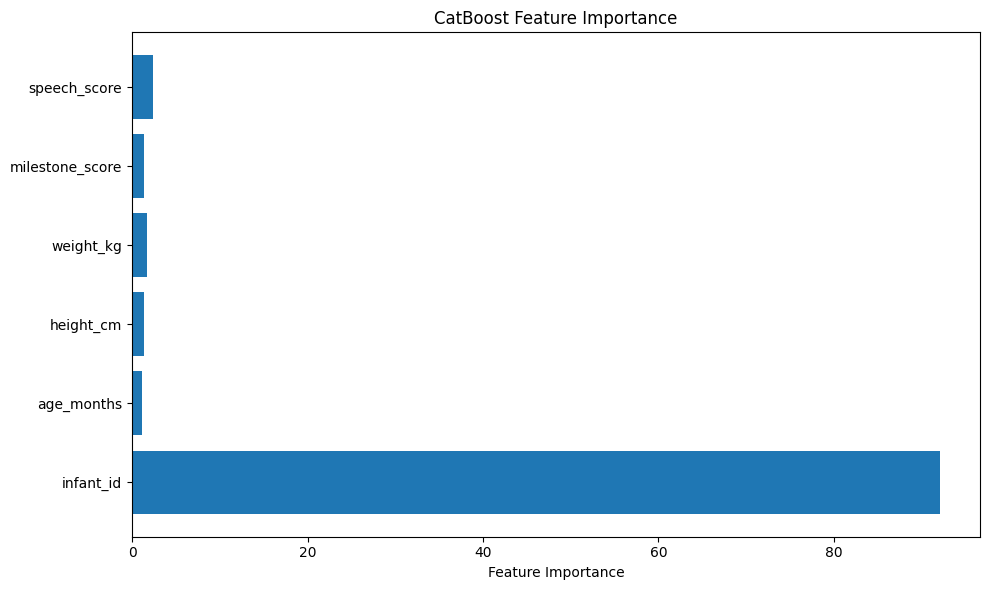

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
feature_importance = catboost.get_feature_importance()
feature_names = ['infant_id', 'age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.tight_layout()
plt.show()

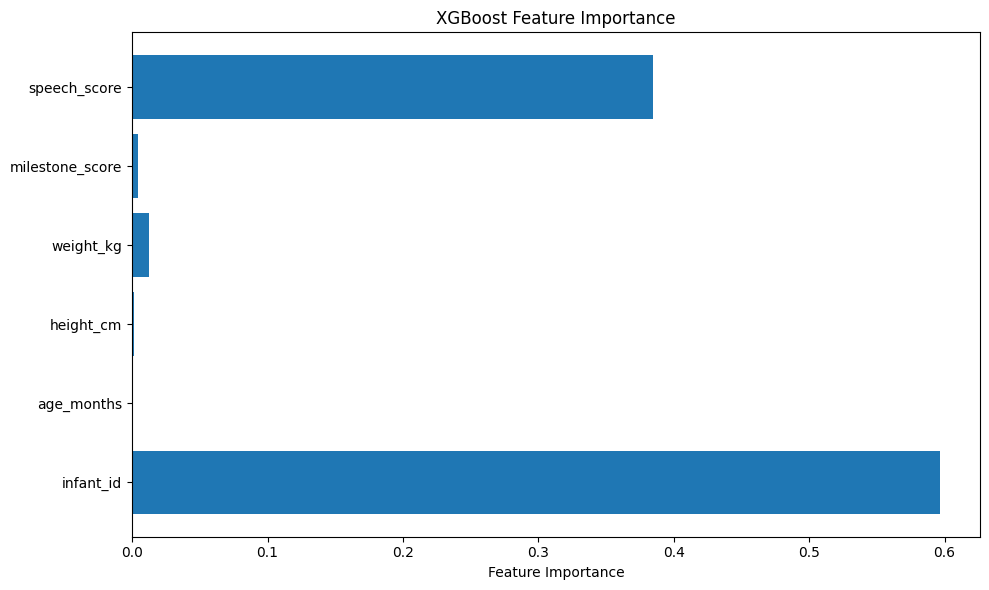

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for XGBoost
feature_importance = xgb.feature_importances_
feature_names = ['infant_id', 'age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
from catboost import CatBoostRegressor

future_years = [5, 10]   # predict 5 and 10 years ahead
future_months = [x * 12 for x in future_years]  # convert to months

predictions = {}

for period in dataset['period'].unique():
    subset = dataset[dataset['period'] == period]

    # Features: age_months
    X = subset[['age_months']]
    # Targets: each numeric development metric
    targets = ['height_cm', 'weight_kg', 'milestone_score', 'speech_score']

    preds = {}
    for target in targets:
        y = subset[target]

        model = CatBoostRegressor()
        model.fit(X, y)

        # Predict future
        future_preds = {}
        for f in future_months:
            pred_value = model.predict(np.array([[subset['age_months'].max() + f]]))[0]
            future_preds[f] = pred_value

        preds[target] = future_preds

    predictions[period] = preds


Learning rate set to 0.03175
0:	learn: 5.3869307	total: 951us	remaining: 951ms
1:	learn: 5.2882154	total: 1.58ms	remaining: 788ms
2:	learn: 5.1897816	total: 1.98ms	remaining: 658ms
3:	learn: 5.0994341	total: 2.54ms	remaining: 632ms
4:	learn: 5.0143086	total: 3.21ms	remaining: 638ms
5:	learn: 4.9284990	total: 3.78ms	remaining: 627ms
6:	learn: 4.8492337	total: 4.07ms	remaining: 577ms
7:	learn: 4.7684695	total: 4.64ms	remaining: 575ms
8:	learn: 4.6918074	total: 5.18ms	remaining: 571ms
9:	learn: 4.6140670	total: 5.69ms	remaining: 564ms
10:	learn: 4.5496140	total: 6.06ms	remaining: 545ms
11:	learn: 4.4871900	total: 6.36ms	remaining: 523ms
12:	learn: 4.4210849	total: 6.88ms	remaining: 522ms
13:	learn: 4.3601295	total: 7.18ms	remaining: 506ms
14:	learn: 4.2976713	total: 7.69ms	remaining: 505ms
15:	learn: 4.2431185	total: 8.23ms	remaining: 506ms
16:	learn: 4.1927836	total: 8.78ms	remaining: 507ms
17:	learn: 4.1402251	total: 9.32ms	remaining: 509ms
18:	learn: 4.0876760	total: 9.85ms	remaining: 

Learning rate set to 0.03175
0:	learn: 5.3869307	total: 493us	remaining: 493ms
1:	learn: 5.2882154	total: 961us	remaining: 480ms
2:	learn: 5.1897816	total: 1.32ms	remaining: 438ms
3:	learn: 5.0994341	total: 1.84ms	remaining: 457ms
4:	learn: 5.0143086	total: 2.4ms	remaining: 478ms
5:	learn: 4.9284990	total: 2.9ms	remaining: 480ms
6:	learn: 4.8492337	total: 3.22ms	remaining: 457ms
7:	learn: 4.7684695	total: 3.78ms	remaining: 469ms
8:	learn: 4.6918074	total: 4.34ms	remaining: 478ms
9:	learn: 4.6140670	total: 4.95ms	remaining: 490ms
10:	learn: 4.5496140	total: 5.29ms	remaining: 475ms
11:	learn: 4.4871900	total: 5.6ms	remaining: 461ms
12:	learn: 4.4210849	total: 6.1ms	remaining: 463ms
13:	learn: 4.3601295	total: 6.43ms	remaining: 453ms
14:	learn: 4.2976713	total: 7.03ms	remaining: 462ms
15:	learn: 4.2431185	total: 7.57ms	remaining: 465ms
16:	learn: 4.1927836	total: 8.2ms	remaining: 474ms
17:	learn: 4.1402251	total: 8.86ms	remaining: 483ms
18:	learn: 4.0876760	total: 9.56ms	remaining: 494ms


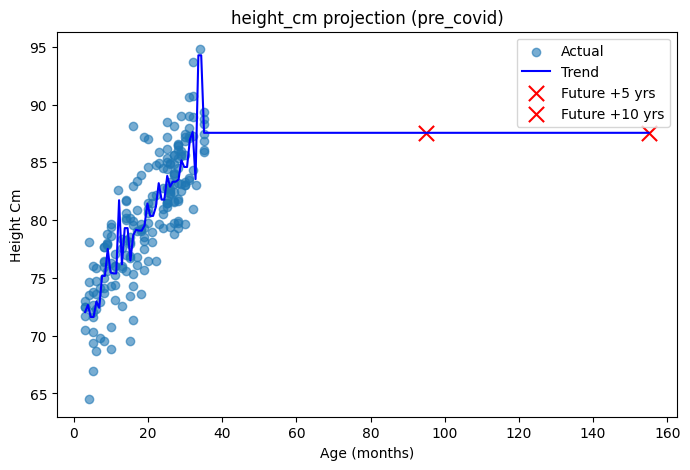

Learning rate set to 0.03175
0:	learn: 3.3841874	total: 668us	remaining: 668ms
1:	learn: 3.3287631	total: 1.21ms	remaining: 605ms
2:	learn: 3.2743468	total: 1.54ms	remaining: 512ms
3:	learn: 3.2213309	total: 2.13ms	remaining: 530ms
4:	learn: 3.1701756	total: 2.45ms	remaining: 488ms
5:	learn: 3.1223280	total: 3.02ms	remaining: 501ms
6:	learn: 3.0760782	total: 3.44ms	remaining: 488ms
7:	learn: 3.0306490	total: 3.95ms	remaining: 490ms
8:	learn: 2.9878802	total: 4.24ms	remaining: 467ms
9:	learn: 2.9461391	total: 4.76ms	remaining: 471ms
10:	learn: 2.9075633	total: 5.15ms	remaining: 463ms
11:	learn: 2.8753398	total: 5.38ms	remaining: 443ms
12:	learn: 2.8392672	total: 5.93ms	remaining: 450ms
13:	learn: 2.8044997	total: 6.39ms	remaining: 450ms
14:	learn: 2.7716081	total: 6.94ms	remaining: 456ms
15:	learn: 2.7401243	total: 7.45ms	remaining: 458ms
16:	learn: 2.7121554	total: 8.04ms	remaining: 465ms
17:	learn: 2.6833795	total: 8.56ms	remaining: 467ms
18:	learn: 2.6566523	total: 9.05ms	remaining: 

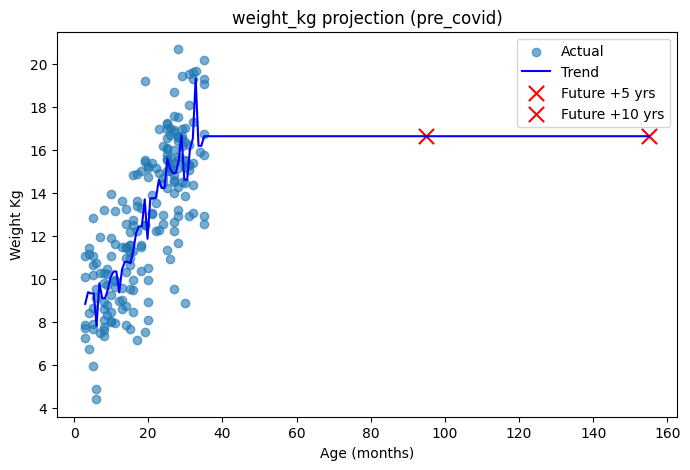

Learning rate set to 0.03175
0:	learn: 11.3405035	total: 511us	remaining: 511ms
1:	learn: 11.3315134	total: 959us	remaining: 479ms
2:	learn: 11.3183139	total: 1.47ms	remaining: 490ms
3:	learn: 11.3092252	total: 2.04ms	remaining: 509ms
4:	learn: 11.3045552	total: 2.54ms	remaining: 505ms
5:	learn: 11.2988816	total: 3.08ms	remaining: 510ms
6:	learn: 11.2942861	total: 3.58ms	remaining: 507ms
7:	learn: 11.2903221	total: 4.09ms	remaining: 507ms
8:	learn: 11.2845073	total: 4.61ms	remaining: 507ms
9:	learn: 11.2750306	total: 5.19ms	remaining: 513ms
10:	learn: 11.2635729	total: 5.79ms	remaining: 520ms
11:	learn: 11.2561335	total: 6.33ms	remaining: 521ms
12:	learn: 11.2481043	total: 6.81ms	remaining: 517ms
13:	learn: 11.2420166	total: 7.3ms	remaining: 514ms
14:	learn: 11.2371282	total: 7.85ms	remaining: 516ms
15:	learn: 11.2298274	total: 8.4ms	remaining: 517ms
16:	learn: 11.2204047	total: 8.93ms	remaining: 517ms
17:	learn: 11.2122055	total: 9.47ms	remaining: 516ms
18:	learn: 11.2070751	total: 10

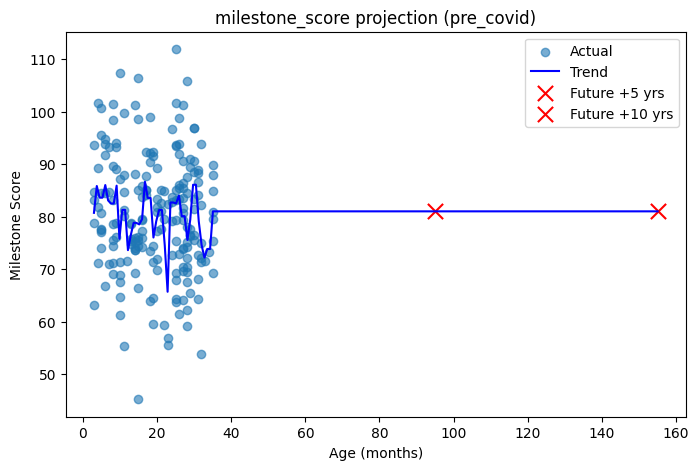

Learning rate set to 0.03175
0:	learn: 7.4792371	total: 507us	remaining: 507ms
1:	learn: 7.4759763	total: 965us	remaining: 482ms
2:	learn: 7.4720639	total: 1.6ms	remaining: 531ms
3:	learn: 7.4668753	total: 2.12ms	remaining: 528ms
4:	learn: 7.4631734	total: 2.63ms	remaining: 523ms
5:	learn: 7.4592866	total: 3.17ms	remaining: 525ms
6:	learn: 7.4552544	total: 3.73ms	remaining: 529ms
7:	learn: 7.4547154	total: 4.13ms	remaining: 512ms
8:	learn: 7.4486161	total: 4.69ms	remaining: 517ms
9:	learn: 7.4439337	total: 5.3ms	remaining: 525ms
10:	learn: 7.4391091	total: 5.8ms	remaining: 522ms
11:	learn: 7.4335075	total: 6.38ms	remaining: 525ms
12:	learn: 7.4327649	total: 6.79ms	remaining: 516ms
13:	learn: 7.4304430	total: 7.28ms	remaining: 513ms
14:	learn: 7.4278044	total: 7.79ms	remaining: 511ms
15:	learn: 7.4214581	total: 8.36ms	remaining: 514ms
16:	learn: 7.4176622	total: 8.97ms	remaining: 519ms
17:	learn: 7.4156774	total: 9.48ms	remaining: 517ms
18:	learn: 7.4130830	total: 10ms	remaining: 517ms


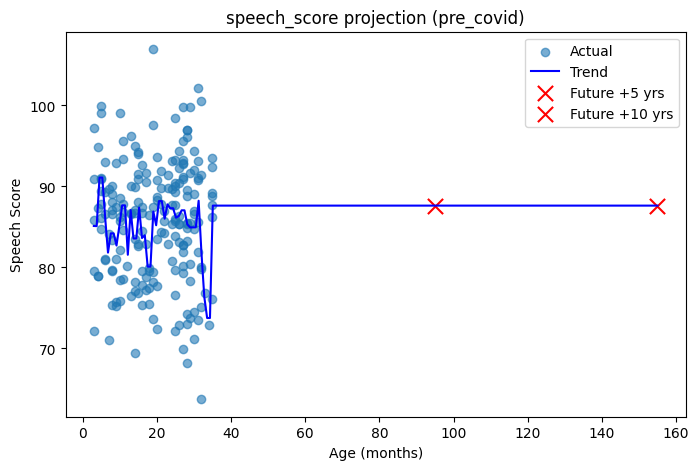

Learning rate set to 0.03175
0:	learn: 5.0971424	total: 443us	remaining: 443ms
1:	learn: 5.0046544	total: 861us	remaining: 430ms
2:	learn: 4.9119468	total: 1.38ms	remaining: 458ms
3:	learn: 4.8207429	total: 1.89ms	remaining: 471ms
4:	learn: 4.7384549	total: 2.52ms	remaining: 502ms
5:	learn: 4.6539574	total: 3.08ms	remaining: 510ms
6:	learn: 4.5775392	total: 3.41ms	remaining: 484ms
7:	learn: 4.5011703	total: 4ms	remaining: 496ms
8:	learn: 4.4278079	total: 4.57ms	remaining: 503ms
9:	learn: 4.3554052	total: 5.17ms	remaining: 512ms
10:	learn: 4.2879136	total: 5.58ms	remaining: 502ms
11:	learn: 4.2237440	total: 6.12ms	remaining: 504ms
12:	learn: 4.1630215	total: 6.65ms	remaining: 505ms
13:	learn: 4.0995113	total: 7.21ms	remaining: 508ms
14:	learn: 4.0386751	total: 7.75ms	remaining: 509ms
15:	learn: 3.9842768	total: 8.24ms	remaining: 507ms
16:	learn: 3.9319703	total: 8.72ms	remaining: 504ms
17:	learn: 3.8803436	total: 9.24ms	remaining: 504ms
18:	learn: 3.8408831	total: 9.57ms	remaining: 494m

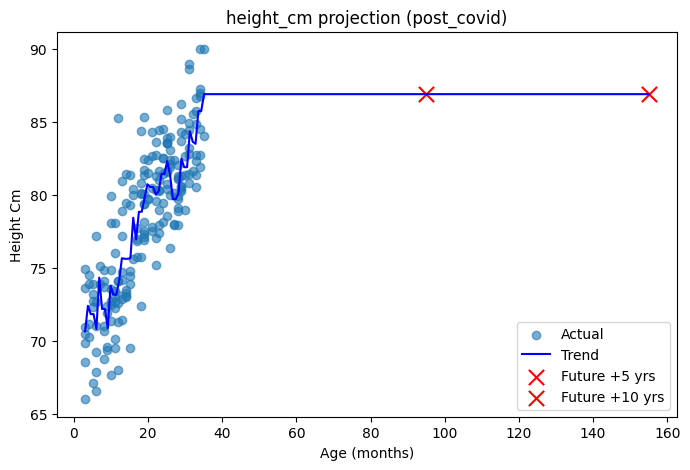

Learning rate set to 0.03175
0:	learn: 3.4704364	total: 468us	remaining: 468ms
1:	learn: 3.4058091	total: 889us	remaining: 444ms
2:	learn: 3.3396263	total: 1.37ms	remaining: 455ms
3:	learn: 3.2756323	total: 1.93ms	remaining: 480ms
4:	learn: 3.2190234	total: 2.5ms	remaining: 497ms
5:	learn: 3.1597157	total: 3ms	remaining: 497ms
6:	learn: 3.1040001	total: 3.58ms	remaining: 508ms
7:	learn: 3.0556778	total: 4.04ms	remaining: 501ms
8:	learn: 3.0037225	total: 4.55ms	remaining: 501ms
9:	learn: 2.9513167	total: 5.14ms	remaining: 508ms
10:	learn: 2.9051000	total: 5.69ms	remaining: 511ms
11:	learn: 2.8595828	total: 6.27ms	remaining: 516ms
12:	learn: 2.8171038	total: 6.78ms	remaining: 514ms
13:	learn: 2.7730708	total: 7.35ms	remaining: 518ms
14:	learn: 2.7325829	total: 7.87ms	remaining: 517ms
15:	learn: 2.6949441	total: 8.37ms	remaining: 515ms
16:	learn: 2.6575400	total: 8.65ms	remaining: 500ms
17:	learn: 2.6227127	total: 9.1ms	remaining: 496ms
18:	learn: 2.5905600	total: 9.59ms	remaining: 495ms


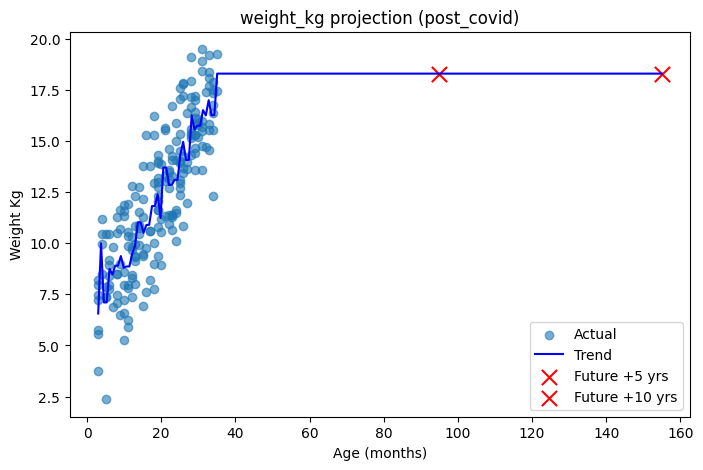

Learning rate set to 0.03175
0:	learn: 11.1999270	total: 481us	remaining: 481ms
1:	learn: 11.1955418	total: 918us	remaining: 458ms
2:	learn: 11.1922046	total: 1.22ms	remaining: 407ms
3:	learn: 11.1827182	total: 1.75ms	remaining: 435ms
4:	learn: 11.1726930	total: 2.23ms	remaining: 444ms
5:	learn: 11.1621045	total: 2.73ms	remaining: 453ms
6:	learn: 11.1586374	total: 3.12ms	remaining: 442ms
7:	learn: 11.1539410	total: 3.63ms	remaining: 450ms
8:	learn: 11.1471764	total: 4.19ms	remaining: 461ms
9:	learn: 11.1441479	total: 4.57ms	remaining: 452ms
10:	learn: 11.1416564	total: 4.91ms	remaining: 441ms
11:	learn: 11.1327952	total: 5.49ms	remaining: 452ms
12:	learn: 11.1247742	total: 6.07ms	remaining: 461ms
13:	learn: 11.1193651	total: 6.56ms	remaining: 462ms
14:	learn: 11.1119145	total: 7.05ms	remaining: 463ms
15:	learn: 11.1053310	total: 7.48ms	remaining: 460ms
16:	learn: 11.1030598	total: 8ms	remaining: 462ms
17:	learn: 11.1003341	total: 8.51ms	remaining: 464ms
18:	learn: 11.0978014	total: 8.9

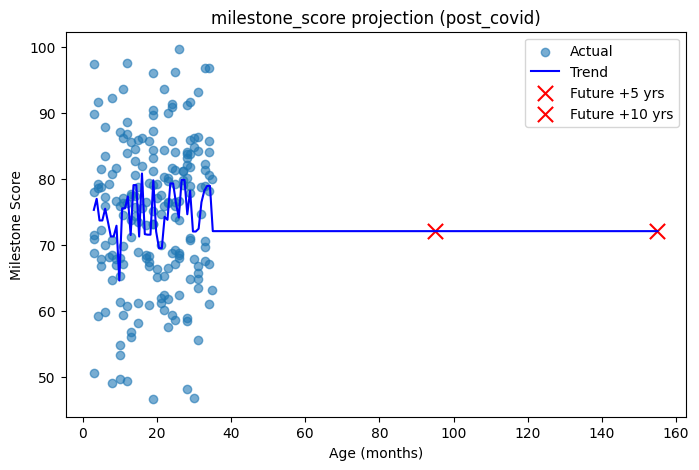

Learning rate set to 0.03175
0:	learn: 8.6326849	total: 423us	remaining: 423ms
1:	learn: 8.6233117	total: 834us	remaining: 416ms
2:	learn: 8.6152999	total: 1.21ms	remaining: 401ms
3:	learn: 8.6072845	total: 1.78ms	remaining: 444ms
4:	learn: 8.5963183	total: 2.31ms	remaining: 459ms
5:	learn: 8.5877127	total: 2.82ms	remaining: 467ms
6:	learn: 8.5817148	total: 3.25ms	remaining: 461ms
7:	learn: 8.5704508	total: 3.79ms	remaining: 470ms
8:	learn: 8.5639798	total: 4.32ms	remaining: 476ms
9:	learn: 8.5590004	total: 4.73ms	remaining: 468ms
10:	learn: 8.5530756	total: 5.14ms	remaining: 462ms
11:	learn: 8.5415592	total: 5.65ms	remaining: 465ms
12:	learn: 8.5342359	total: 6.15ms	remaining: 467ms
13:	learn: 8.5276558	total: 6.68ms	remaining: 470ms
14:	learn: 8.5189267	total: 7.18ms	remaining: 472ms
15:	learn: 8.5083060	total: 7.78ms	remaining: 478ms
16:	learn: 8.4999101	total: 8.36ms	remaining: 484ms
17:	learn: 8.4961943	total: 8.88ms	remaining: 484ms
18:	learn: 8.4919299	total: 9.35ms	remaining: 4

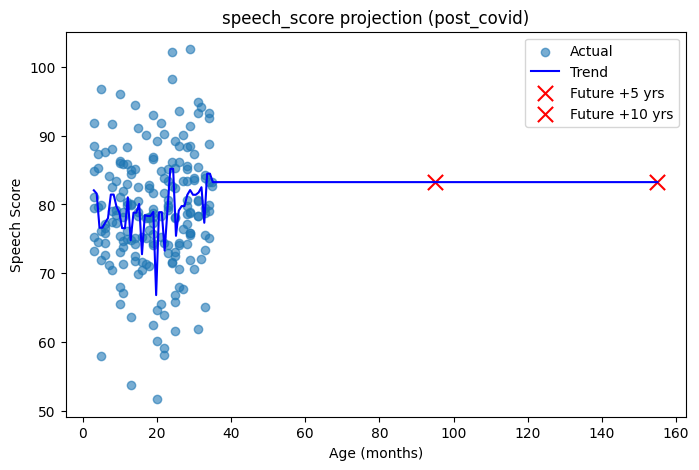

Learning rate set to 0.03175
0:	learn: 4.7938144	total: 442us	remaining: 442ms
1:	learn: 4.7179804	total: 903us	remaining: 451ms
2:	learn: 4.6382748	total: 1.48ms	remaining: 491ms
3:	learn: 4.5622320	total: 2.04ms	remaining: 507ms
4:	learn: 4.4965924	total: 2.6ms	remaining: 517ms
5:	learn: 4.4282160	total: 3.12ms	remaining: 517ms
6:	learn: 4.3628808	total: 3.65ms	remaining: 518ms
7:	learn: 4.3014146	total: 4.17ms	remaining: 516ms
8:	learn: 4.2377739	total: 4.76ms	remaining: 524ms
9:	learn: 4.1802008	total: 5.25ms	remaining: 520ms
10:	learn: 4.1244349	total: 5.76ms	remaining: 518ms
11:	learn: 4.0720693	total: 6.3ms	remaining: 519ms
12:	learn: 4.0220050	total: 6.77ms	remaining: 514ms
13:	learn: 3.9729824	total: 7.35ms	remaining: 518ms
14:	learn: 3.9257872	total: 7.86ms	remaining: 516ms
15:	learn: 3.8814904	total: 8.29ms	remaining: 510ms
16:	learn: 3.8409946	total: 8.82ms	remaining: 510ms
17:	learn: 3.8018998	total: 9.33ms	remaining: 509ms
18:	learn: 3.7644232	total: 9.86ms	remaining: 509

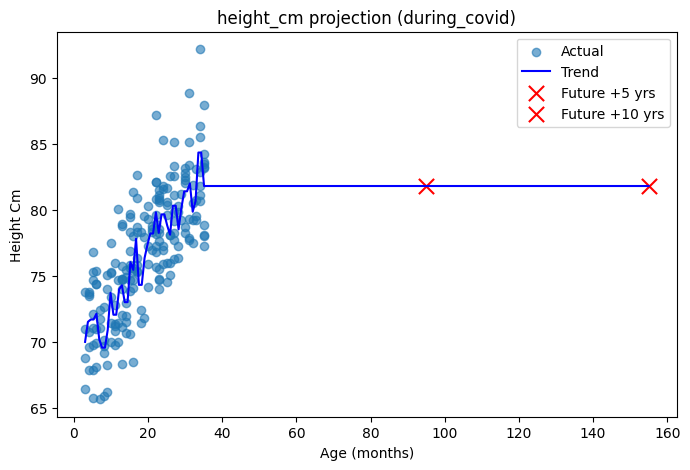

Learning rate set to 0.03175
0:	learn: 3.4314394	total: 458us	remaining: 458ms
1:	learn: 3.3729076	total: 886us	remaining: 443ms
2:	learn: 3.3138865	total: 1.36ms	remaining: 453ms
3:	learn: 3.2578116	total: 1.89ms	remaining: 471ms
4:	learn: 3.2052057	total: 2.37ms	remaining: 472ms
5:	learn: 3.1531463	total: 2.92ms	remaining: 483ms
6:	learn: 3.1043828	total: 3.46ms	remaining: 492ms
7:	learn: 3.0593565	total: 3.92ms	remaining: 486ms
8:	learn: 3.0115670	total: 4.5ms	remaining: 495ms
9:	learn: 2.9659046	total: 4.99ms	remaining: 494ms
10:	learn: 2.9234835	total: 5.47ms	remaining: 492ms
11:	learn: 2.8806442	total: 6.02ms	remaining: 495ms
12:	learn: 2.8436456	total: 6.54ms	remaining: 497ms
13:	learn: 2.8056527	total: 7.09ms	remaining: 500ms
14:	learn: 2.7738241	total: 7.6ms	remaining: 499ms
15:	learn: 2.7420885	total: 8.15ms	remaining: 501ms
16:	learn: 2.7095746	total: 8.67ms	remaining: 502ms
17:	learn: 2.6780023	total: 9.16ms	remaining: 500ms
18:	learn: 2.6475550	total: 9.69ms	remaining: 500

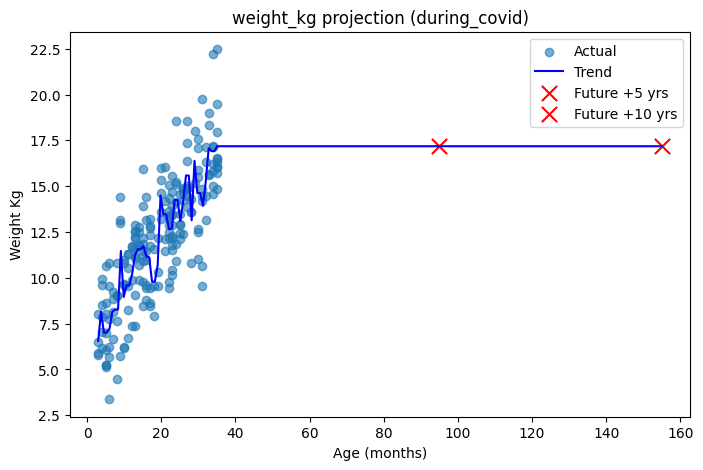

Learning rate set to 0.03175
0:	learn: 11.6777488	total: 670us	remaining: 670ms
1:	learn: 11.6681677	total: 1.21ms	remaining: 602ms
2:	learn: 11.6596371	total: 1.73ms	remaining: 574ms
3:	learn: 11.6504440	total: 2.19ms	remaining: 546ms
4:	learn: 11.6434803	total: 2.68ms	remaining: 533ms
5:	learn: 11.6381418	total: 3.06ms	remaining: 507ms
6:	learn: 11.6291640	total: 3.59ms	remaining: 509ms
7:	learn: 11.6210490	total: 4.16ms	remaining: 516ms
8:	learn: 11.6135349	total: 4.66ms	remaining: 513ms
9:	learn: 11.6070032	total: 5.14ms	remaining: 509ms
10:	learn: 11.5989876	total: 5.63ms	remaining: 506ms
11:	learn: 11.5843886	total: 6.17ms	remaining: 508ms
12:	learn: 11.5801511	total: 6.75ms	remaining: 512ms
13:	learn: 11.5753279	total: 7.23ms	remaining: 509ms
14:	learn: 11.5739286	total: 7.75ms	remaining: 509ms
15:	learn: 11.5670814	total: 8.21ms	remaining: 505ms
16:	learn: 11.5638662	total: 8.66ms	remaining: 501ms
17:	learn: 11.5586177	total: 9.18ms	remaining: 501ms
18:	learn: 11.5561519	total:

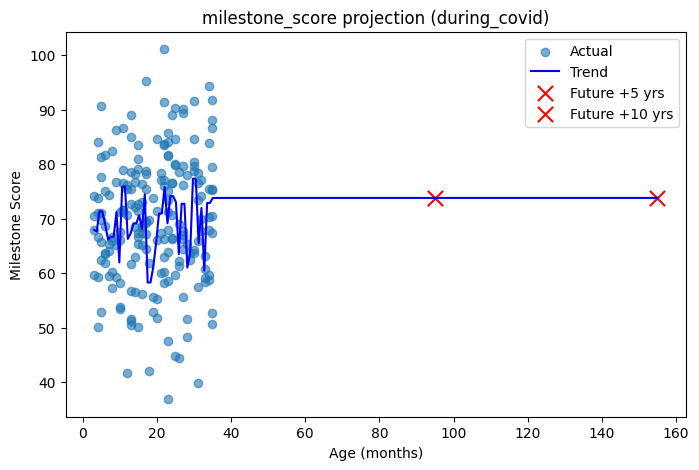

Learning rate set to 0.03175
0:	learn: 14.2773705	total: 584us	remaining: 584ms
1:	learn: 14.2718356	total: 1.16ms	remaining: 576ms
2:	learn: 14.2500178	total: 1.7ms	remaining: 564ms
3:	learn: 14.2319689	total: 2.07ms	remaining: 515ms
4:	learn: 14.2147738	total: 2.6ms	remaining: 518ms
5:	learn: 14.1997408	total: 3.1ms	remaining: 514ms
6:	learn: 14.1787024	total: 3.62ms	remaining: 514ms
7:	learn: 14.1722620	total: 4.12ms	remaining: 510ms
8:	learn: 14.1613004	total: 4.59ms	remaining: 505ms
9:	learn: 14.1485719	total: 5.04ms	remaining: 499ms
10:	learn: 14.1424430	total: 5.54ms	remaining: 498ms
11:	learn: 14.1360356	total: 6.04ms	remaining: 497ms
12:	learn: 14.1316830	total: 6.49ms	remaining: 493ms
13:	learn: 14.1218228	total: 6.98ms	remaining: 492ms
14:	learn: 14.1076673	total: 7.46ms	remaining: 490ms
15:	learn: 14.0976226	total: 7.96ms	remaining: 490ms
16:	learn: 14.0902950	total: 8.29ms	remaining: 480ms
17:	learn: 14.0849139	total: 8.82ms	remaining: 481ms
18:	learn: 14.0738243	total: 9.

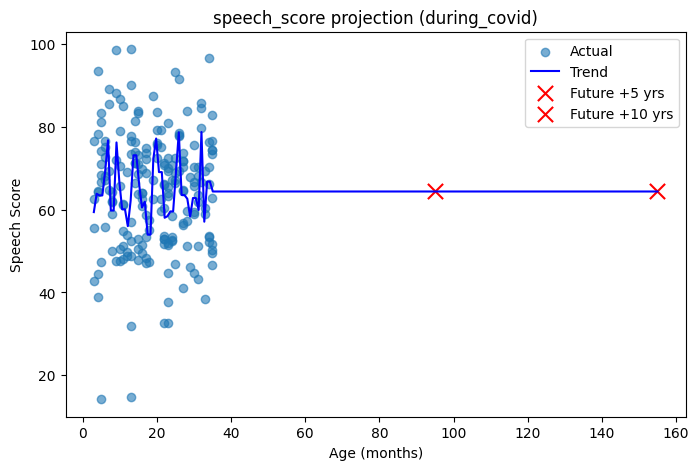

{'during_covid': {'height_cm': {60: np.float64(81.82383656586626),
                                120: np.float64(81.82383656586626)},
                  'milestone_score': {60: np.float64(73.82619435844322),
                                      120: np.float64(73.82619435844322)},
                  'speech_score': {60: np.float64(64.39246488400192),
                                   120: np.float64(64.39246488400192)},
                  'weight_kg': {60: np.float64(17.180362072514264),
                                120: np.float64(17.180362072514264)}},
 'post_covid': {'height_cm': {60: np.float64(86.89696165689513),
                              120: np.float64(86.89696165689513)},
                'milestone_score': {60: np.float64(72.12557707712104),
                                    120: np.float64(72.12557707712104)},
                'speech_score': {60: np.float64(83.24776948275503),
                                 120: np.float64(83.24776948275503)},
                'weig

In [24]:
# ======================================
# Step 3: Visualize projections
# ======================================
def plot_future(period, predictions, target):
    subset = dataset[dataset['period'] == period]
    plt.figure(figsize=(8,5))
    plt.scatter(subset['age_months'], subset[target], alpha=0.6, label="Actual")

    # Fit line
    model = CatBoostRegressor()
    model.fit(subset[['age_months']], subset[target])
    ages_range = np.linspace(subset['age_months'].min(), subset['age_months'].max() + max(future_months), 200).reshape(-1,1)
    plt.plot(ages_range, model.predict(ages_range), color="blue", label="Trend")

    # Future predictions
    for f, val in predictions[period][target].items():
        future_age = subset['age_months'].max() + f
        plt.scatter(future_age, val, color="red", marker="x", s=120, label=f"Future +{f//12} yrs")

    plt.title(f"{target} projection ({period})")
    plt.xlabel("Age (months)")
    plt.ylabel(target.replace("_"," ").title())
    plt.legend()
    plt.show()

# Example: visualize all metrics for Pre-COVID
for period in dataset['period'].unique():
    for target in ['height_cm','weight_kg','milestone_score','speech_score']:
        plot_future(period, predictions, target)

# ======================================
# Step 4: Display numerical results
# ======================================
import pprint
pprint.pprint(predictions)

In [25]:
import pickle
from flask import Flask, request, render_template

In [26]:
# Save model & encoder
with open("catBoost.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [27]:
!pip install flask-ngrok


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
!pip install pyngrok



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import os
os.makedirs("templates", exist_ok=True)


In [30]:
import pandas as pd
import numpy as np
from tabpfn import TabPFNRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle

# ================================
# 1. Load your dataset
# ================================
df = pd.read_csv("infant_development_dataset.csv")

# Features (5 inputs matching your Flask form)
X = df[["age_months", "height_cm", "weight_kg", "speech_score", "milestone_score"]]

# Target (label to predict, e.g., 'period')
y = df["period"]

# ================================
# 2. Split dataset (train/test)
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# ================================
# 3. Encode target variable (after split)
# ================================
# TabPFNRegressor requires numerical targets, so we encode the categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# ================================
# 4. Train model
# ================================
# Using TabPFNRegressor as requested, but note it's for regression tasks
# If you intend classification, use TabPFNClassifier instead.
model1 = CatBoostRegressor()
model1.fit(X_train, y_train_encoded)

# ================================
# 5. Save trained model and label encoder
# ================================
# Removed redundant model saving as the user is evaluating the tabpfn model trained earlier.
# pickle.dump(model1, open("tabpfn.pkl", "wb"))
# pickle.dump(label_encoder, open("label_encoder.pkl", "wb")) # Save the encoder too

print(" Train-test split updated to 0.25")
print(" y_train and y_test encoded")
print(" Model trained with updated split")

Learning rate set to 0.03609
0:	learn: 0.8027030	total: 1.51ms	remaining: 1.51s
1:	learn: 0.7911434	total: 2.84ms	remaining: 1.42s
2:	learn: 0.7805326	total: 4.09ms	remaining: 1.36s
3:	learn: 0.7695414	total: 5.4ms	remaining: 1.34s
4:	learn: 0.7596215	total: 6.71ms	remaining: 1.34s
5:	learn: 0.7507725	total: 7.99ms	remaining: 1.32s
6:	learn: 0.7425853	total: 9.25ms	remaining: 1.31s
7:	learn: 0.7335167	total: 10.5ms	remaining: 1.3s
8:	learn: 0.7253805	total: 11.9ms	remaining: 1.31s
9:	learn: 0.7175876	total: 13.2ms	remaining: 1.31s
10:	learn: 0.7107463	total: 14.7ms	remaining: 1.32s
11:	learn: 0.7036390	total: 16ms	remaining: 1.31s
12:	learn: 0.6968300	total: 17.2ms	remaining: 1.31s
13:	learn: 0.6905195	total: 18.6ms	remaining: 1.31s
14:	learn: 0.6845866	total: 19.9ms	remaining: 1.31s
15:	learn: 0.6777807	total: 21.2ms	remaining: 1.3s
16:	learn: 0.6723241	total: 22.5ms	remaining: 1.3s
17:	learn: 0.6674006	total: 23.8ms	remaining: 1.3s
18:	learn: 0.6620254	total: 25.1ms	remaining: 1.3s
1

In [ ]:
# app.py
from flask import Flask, render_template, request, jsonify, redirect, url_for
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import threading
import time
import os
import requests
from pyngrok import ngrok, conf
import atexit
from catboost import CatBoostClassifier

# Initialize Flask app
app = Flask(__name__)

# Global variables
model = None
label_encoder = None
ngrok_tunnel = None

def load_model_and_encoder(dataset_df):
    """Load and train the machine learning model"""
    global model, label_encoder

    try:
        # Prepare features and target using the provided dataset
        X = dataset_df[['age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']]
        y = dataset_df['period']

        # Encode labels
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_encoded, test_size=0.25, random_state=42
        )

        # Train model
        print("Training CatBoost Classifier...")
        model = CatBoostClassifier(
            iterations=100,
            depth=6,
            learning_rate=0.1,
            random_state=42,
            verbose=False
        )
        model.fit(X_train, y_train)

        print(f"Model trained successfully!")
        print(f"Classes: {list(label_encoder.classes_)}")
        
        # Test the model
        accuracy = model.score(X_test, y_test)
        print(f"Model accuracy: {accuracy:.4f}")

    except Exception as e:
        print(f"Error loading or training model: {str(e)}")
        raise e

def setup_ngrok():
    """Setup ngrok tunnel"""
    global ngrok_tunnel

    try:
        # Kill existing ngrok processes
        ngrok.kill()

        # Use your ngrok auth token
        NGROK_AUTH_TOKEN = "34gs0zsaYsoHr4Di1kfor3FMtnl_4zfKro1zdzPFoWrvaQ6Vw"

        if NGROK_AUTH_TOKEN:
            ngrok.set_auth_token(NGROK_AUTH_TOKEN)
            print("✅ Ngrok authtoken set successfully")

        # Create tunnel
        ngrok_tunnel = ngrok.connect(5000)
        public_url = ngrok_tunnel.public_url

        print("🌐 Ngrok tunnel created successfully!")
        print("=" * 60)
        print(f"🚀 Your app is now live at: {public_url}")
        print("=" * 60)

        return public_url

    except Exception as e:
        print(f"❌ Error setting up ngrok: {str(e)}")
        print("💡 You can still access the app locally at: http://localhost:5000")
        return None

def cleanup():
    """Cleanup function to close ngrok tunnel on exit"""
    if ngrok_tunnel:
        print("🔒 Closing ngrok tunnel...")
        ngrok.disconnect(ngrok_tunnel.public_url)
        ngrok.kill()
    print("👋 Ngrok tunnel closed")

# Register cleanup function
atexit.register(cleanup)

@app.route('/')
def home():
    """Home page"""
    return '''
    <!DOCTYPE html>
    <html>
    <head>
        <title>Infant Development Prediction</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 0;
                padding: 20px;
                background: #f5f5f5;
            }
            .container {
                max-width: 600px;
                margin: 0 auto;
                background: white;
                padding: 30px;
                border-radius: 10px;
                box-shadow: 0 2px 10px rgba(0,0,0,0.1);
            }
            h1 {
                color: #333;
                text-align: center;
                margin-bottom: 30px;
                font-size: 24px;
            }
            h2 {
                color: #555;
                font-size: 18px;
                margin-bottom: 20px;
            }
            .form-group {
                margin-bottom: 20px;
            }
            label {
                display: block;
                margin-bottom: 8px;
                font-weight: bold;
                color: #333;
            }
            input {
                width: 100%;
                padding: 12px;
                border: 2px solid #ddd;
                border-radius: 5px;
                font-size: 16px;
                box-sizing: border-box;
            }
            input:focus {
                border-color: #007bff;
                outline: none;
            }
            button {
                background: #007bff;
                color: white;
                padding: 15px 30px;
                border: none;
                border-radius: 5px;
                cursor: pointer;
                font-size: 16px;
                width: 100%;
                font-weight: bold;
            }
            button:hover {
                background: #0056b3;
            }
            .result {
                margin-top: 30px;
                padding: 25px;
                border-radius: 10px;
                background: #f8f9fa;
                border: 2px solid #dee2e6;
            }
            .prediction-title {
                font-size: 20px;
                font-weight: bold;
                color: #155724;
                margin-bottom: 15px;
                text-align: center;
            }
            .confidence {
                font-size: 16px;
                color: #666;
                margin-bottom: 20px;
                text-align: center;
            }
            .probability-item {
                margin: 10px 0;
                padding: 10px;
                background: white;
                border-radius: 5px;
                border-left: 4px solid #007bff;
            }
            .probability-label {
                font-weight: bold;
                color: #333;
            }
            .probability-value {
                float: right;
                color: #666;
            }
            .back-link {
                display: block;
                text-align: center;
                margin-top: 20px;
                color: #007bff;
                text-decoration: none;
            }
            .back-link:hover {
                text-decoration: underline;
            }
        </style>
    </head>
    <body>
        <div class="container">
            <h1>Infant Development Period Classifier</h1>
            <form method="post" action="/predict">
                <h2>Predict Development Period</h2>

                <div class="form-group">
                    <label>Age (months):</label>
                    <input type="number" step="0.1" name="age_months" required>
                </div>

                <div class="form-group">
                    <label>Height (cm):</label>
                    <input type="number" step="0.1" name="height_cm" required>
                </div>

                <div class="form-group">
                    <label>Weight (kg):</label>
                    <input type="number" step="0.1" name="weight_kg" required>
                </div>

                <div class="form-group">
                    <label>Milestone Score (0-100):</label>
                    <input type="number" step="0.1" name="milestone_score" min="0" max="100" required>
                </div>

                <div class="form-group">
                    <label>Speech Score (0-100):</label>
                    <input type="number" step="0.1" name="speech_score" min="0" max="100" required>
                </div>

                <button type="submit">Predict Development Period</button>
            </form>
        </div>
    </body>
    </html>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    """Prediction endpoint"""
    try:
        if model is None or label_encoder is None:
            return '''
            <div class="container">
                <h1>Infant Development Period Classifier</h1>
                <div class="result">
                    <div style="color: #721c24; text-align: center;">
                        Model not loaded. Please try again later.
                    </div>
                </div>
            </div>
            ''', 503

        # Get data from form
        data = request.form

        # Validate input
        required_fields = ['age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']
        for field in required_fields:
            if field not in data:
                return f'''
                <div class="container">
                    <h1>Infant Development Period Classifier</h1>
                    <div class="result">
                        <div style="color: #721c24; text-align: center;">
                            Missing field: {field}
                        </div>
                    </div>
                </div>
                ''', 400

        # Prepare features
        features = np.array([[
            float(data['age_months']),
            float(data['height_cm']),
            float(data['weight_kg']),
            float(data['milestone_score']),
            float(data['speech_score'])
        ]])

        # Make prediction
        prediction_encoded = model.predict(features)
        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]

        # Get probabilities
        probabilities = model.predict_proba(features)[0]

        # Create probability dictionary
        prob_dict = {}
        for i, class_name in enumerate(label_encoder.classes_):
            prob_dict[class_name] = float(probabilities[i])

        confidence = float(np.max(probabilities))

        # Create result HTML
        result_html = f'''
        <!DOCTYPE html>
        <html>
        <head>
            <title>Prediction Result</title>
            <style>
                body {{
                    font-family: Arial, sans-serif;
                    margin: 0;
                    padding: 20px;
                    background: #f5f5f5;
                }}
                .container {{
                    max-width: 600px;
                    margin: 0 auto;
                    background: white;
                    padding: 30px;
                    border-radius: 10px;
                    box-shadow: 0 2px 10px rgba(0,0,0,0.1);
                }}
                .prediction-title {{
                    font-size: 24px;
                    font-weight: bold;
                    color: #155724;
                    margin-bottom: 15px;
                    text-align: center;
                }}
                .confidence {{
                    font-size: 18px;
                    color: #666;
                    margin-bottom: 25px;
                    text-align: center;
                }}
                .probability-section {{
                    margin: 20px 0;
                }}
                .probability-item {{
                    margin: 15px 0;
                    padding: 15px;
                    background: #f8f9fa;
                    border-radius: 8px;
                    border-left: 5px solid #007bff;
                }}
                .probability-label {{
                    font-weight: bold;
                    color: #333;
                    font-size: 16px;
                }}
                .probability-value {{
                    float: right;
                    color: #666;
                    font-size: 16px;
                    font-weight: bold;
                }}
                .back-link {{
                    display: block;
                    text-align: center;
                    margin-top: 30px;
                    color: #007bff;
                    text-decoration: none;
                    font-size: 16px;
                }}
                .back-link:hover {{
                    text-decoration: underline;
                }}
            </style>
        </head>
        <body>
            <div class="container">
                <div class="prediction-title">Predicted Development Period: {prediction_label.upper().replace('_', ' ')}</div>
                <div class="confidence">Confidence: {(confidence * 100):.2f}%</div>

                <div class="probability-section">
                    <div style="font-weight: bold; margin-bottom: 15px; font-size: 18px;">Probability Distribution:</div>
        '''

        # Add probability items
        for class_name, prob in prob_dict.items():
            percentage = prob * 100
            display_name = class_name.upper().replace('_', ' ')
            result_html += f'''
                    <div class="probability-item">
                        <span class="probability-label">{display_name}</span>
                        <span class="probability-value">{percentage:.2f}%</span>
                    </div>
            '''

        result_html += '''
                </div>
                <a href="/" class="back-link">← Make Another Prediction</a>
            </div>
        </body>
        </html>
        '''
        return result_html

    except Exception as e:
        return f'''
        <div class="container">
            <h1>Infant Development Period Classifier</h1>
            <div class="result">
                <div style="color: #721c24; text-align: center;">
                    Prediction error: {str(e)}
                </div>
            </div>
        </div>
        ''', 400

@app.route('/api/predict', methods=['POST'])
def api_predict():
    """API endpoint for JSON responses"""
    try:
        if model is None or label_encoder is None:
            return jsonify({
                'status': 'error',
                'message': 'Model not loaded'
            }), 503

        data = request.get_json()

        # Validate input
        required_fields = ['age_months', 'height_cm', 'weight_kg', 'milestone_score', 'speech_score']
        for field in required_fields:
            if field not in data:
                return jsonify({
                    'status': 'error',
                    'message': f'Missing field: {field}'
                }), 400

        # Prepare features
        features = np.array([[
            float(data['age_months']),
            float(data['height_cm']),
            float(data['weight_kg']),
            float(data['milestone_score']),
            float(data['speech_score'])
        ]])

        # Make prediction
        prediction_encoded = model.predict(features)
        prediction_label = label_encoder.inverse_transform(prediction_encoded)[0]
        probabilities = model.predict_proba(features)[0]
        confidence = float(np.max(probabilities))

        # Create probability dictionary
        prob_dict = {}
        for i, class_name in enumerate(label_encoder.classes_):
            prob_dict[class_name] = float(probabilities[i])

        return jsonify({
            'status': 'success',
            'prediction': prediction_label,
            'confidence': confidence,
            'probabilities': prob_dict
        })

    except Exception as e:
        return jsonify({
            'status': 'error',
            'message': str(e)
        }), 400

@app.route('/health')
def health_check():
    """Health check endpoint"""
    return jsonify({
        'status': 'healthy',
        'model_loaded': model is not None,
        'classes': label_encoder.classes_.tolist() if label_encoder else None
    })

def start_application(dataset_df):
    """Start the Flask application with ngrok"""
    print("🚀 Starting Flask Application with Ngrok...")

    # Load and train model first
    print("📦 Loading and training machine learning model...")
    load_model_and_encoder(dataset_df)

    # Setup ngrok in a separate thread with delay
    def delayed_ngrok():
        time.sleep(3)  # Wait for Flask to start
        setup_ngrok()

    ngrok_thread = threading.Thread(target=delayed_ngrok)
    ngrok_thread.daemon = True
    ngrok_thread.start()

    # Start Flask app
    print("🌍 Starting Flask server on http://localhost:5000")
    print("⏳ Please wait for ngrok tunnel to be established...")
    app.run(host='0.0.0.0', port=5000, debug=False, threaded=True)

# For running directly - FIXED VERSION
if __name__ == '__main__':
    try:
        # Load the dataset first
        print("📊 Loading dataset...")
        dataset = pd.read_csv('infant_development_dataset.csv')
        print(f"✅ Dataset loaded with {len(dataset)} rows")
        
        # Start the application
        start_application(dataset)
    except FileNotFoundError:
        print("❌ Error: 'infant_development_dataset.csv' file not found.")
        print("💡 Please make sure the dataset file is in the same directory.")
    except Exception as e:
        print(f"❌ Error starting application: {str(e)}")

📊 Loading dataset...
✅ Dataset loaded with 600 rows
🚀 Starting Flask Application with Ngrok...
📦 Loading and training machine learning model...
Training CatBoost Classifier...
Model trained successfully!
Classes: ['during_covid', 'post_covid', 'pre_covid']
Model accuracy: 0.6333
🌍 Starting Flask server on http://localhost:5000
⏳ Please wait for ngrok tunnel to be established...
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.0.103:5000
Press CTRL+C to quit


✅ Ngrok authtoken set successfully
🌐 Ngrok tunnel created successfully!
🚀 Your app is now live at: https://nondilatable-evanescently-jeri.ngrok-free.dev


127.0.0.1 - - [28/Oct/2025 15:44:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2025 15:44:40] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [28/Oct/2025 15:45:08] "POST /predict HTTP/1.1" 200 -
